In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
!pip install xgboost
import xgboost

In [ ]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

# data understanding


In [ ]:
print("Shape of training dataset : " , train.shape)
print("Shape of testing dataset : " , test.shape)

Shape of training dataset :  (22730, 18)
Shape of testing dataset :  (15154, 17)


In [ ]:
null_train = train.isna().sum().sum()
duplicates_train= train.duplicated().sum()
null_test = test.isna().sum().sum()
duplicates_test= test.duplicated().sum()
t=pd.DataFrame({'dt':["train" ,"test"] , 'missing':[null_train,null_test],'duplicates':[duplicates_train,duplicates_test]})
t

,dt,missing,duplicates
0,train,0,0
1,test,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 15154 non-null  int64
 1   squareMeters       15154 non-null  int64
 2   numberOfRooms      15154 non-null  int64
 3   hasYard            15154 non-null  int64
 4   hasPool            15154 non-null  int64
 5   floors             15154 non-null  int64
 6   cityCode           15154 non-null  int64
 7   cityPartRange      15154 non-null  int64
 8   numPrevOwners      15154 non-null  int64
 9   made               15154 non-null  int64
 10  isNewBuilt         15154 non-null  int64
 11  hasStormProtector  15154 non-null  int64
 12  basement           15154 non-null  int64
 13  attic              15154 non-null  int64
 14  garage             15154 non-null  int64
 15  hasStorageRoom     15154 non-null  int64
 16  hasGuestRoom       15154 non-null  int64
dtypes: int64(17)

In [ ]:
train.describe()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,22730.000000,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,11364.500000,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,6561.730145,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,0.000000,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,5682.250000,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,11364.500000,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,17046.750000,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,22729.000000,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


#after observing statistics of data we can observe there may be outliers in squareMeters , floors ,made ,basement,attic,garage

In [ ]:
 test.describe()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000
mean,30306.500000,45729.407681,47.874951,0.483371,0.445361,46.401148,50185.582750,5.616933,5.602547,2006.225485,0.472219,0.463442,5299.415468,5057.506599,525.091065,0.463178,5.095618
std,4374.727325,29200.142520,28.164077,0.499740,0.497022,27.000547,31227.690126,2.727914,2.718316,8.156347,0.499244,0.498678,2980.156234,2928.004147,268.504745,0.498659,3.049174
min,22730.000000,69.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,8.000000,1.000000,8.000000,0.000000,0.000000
25%,26518.250000,19189.000000,25.000000,0.000000,0.000000,25.000000,23141.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,3114.000000,2567.000000,294.250000,0.000000,2.000000
50%,30306.500000,43802.000000,46.000000,0.000000,0.000000,44.000000,50693.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,5017.000000,501.000000,0.000000,5.000000
75%,34094.750000,70898.000000,75.000000,1.000000,1.000000,69.000000,76264.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7739.000000,7650.750000,757.000000,1.000000,8.000000
max,37883.000000,99999.000000,100.000000,1.000000,1.000000,100.000000,977950.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,89016.000000,38535.000000,1000.000000,1.000000,10.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'squareMeters'}>,
        <AxesSubplot:title={'center':'numberOfRooms'}>,
        <AxesSubplot:title={'center':'hasYard'}>],
       [<AxesSubplot:title={'center':'hasPool'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'cityCode'}>,
        <AxesSubplot:title={'center':'cityPartRange'}>],
       [<AxesSubplot:title={'center':'numPrevOwners'}>,
        <AxesSubplot:title={'center':'made'}>,
        <AxesSubplot:title={'center':'isNewBuilt'}>,
        <AxesSubplot:title={'center':'hasStormProtector'}>],
       [<AxesSubplot:title={'center':'basement'}>,
        <AxesSubplot:title={'center':'attic'}>,
        <AxesSubplot:title={'center':'garage'}>,
        <AxesSubplot:title={'center':'hasStorageRoom'}>],
       [<AxesSubplot:title={'center':'hasGuestRoom'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

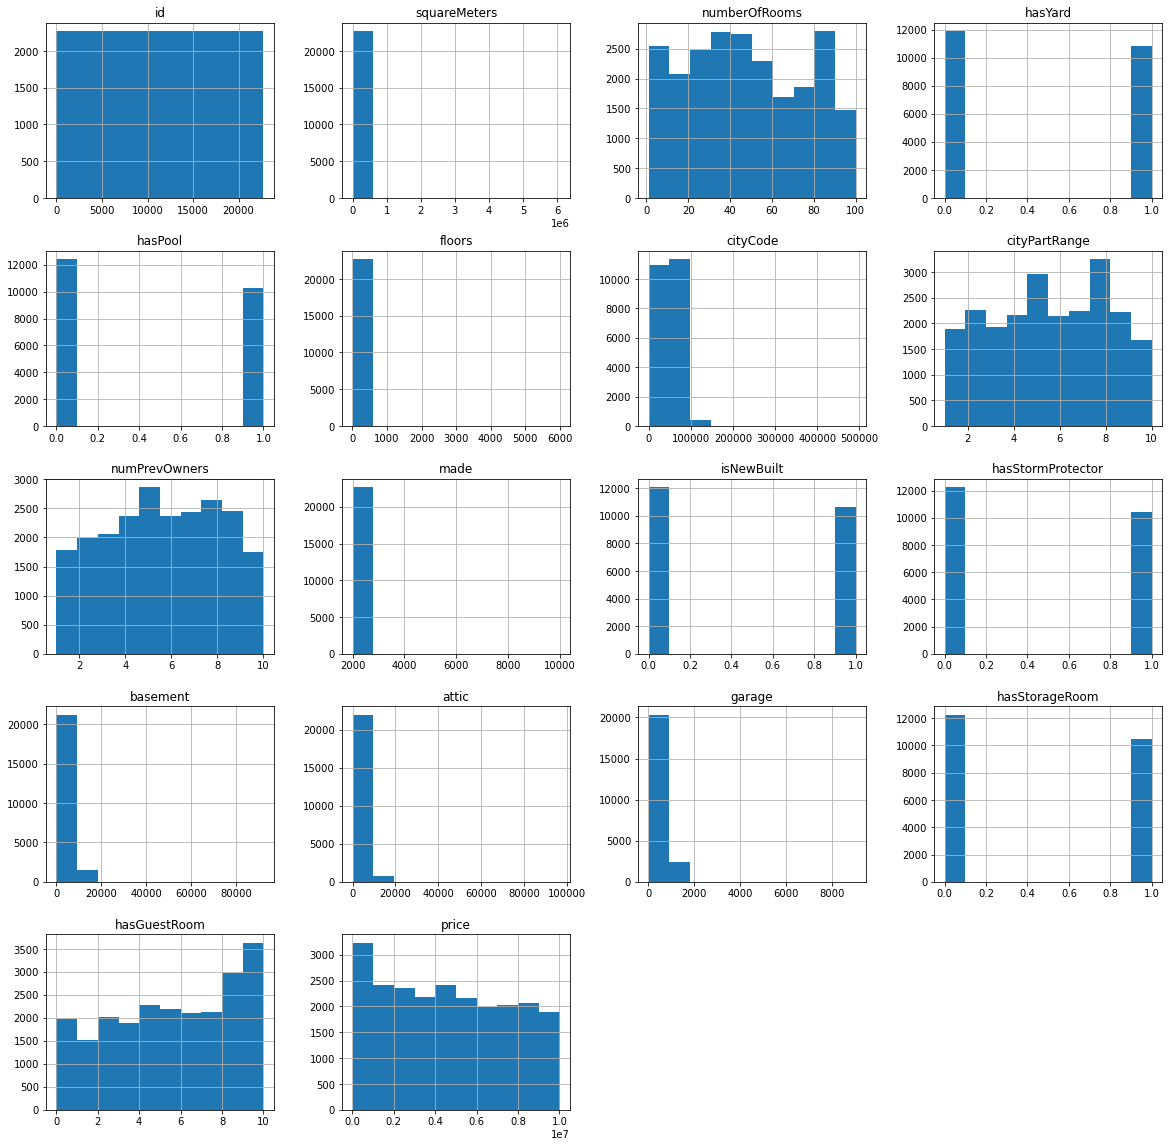

In [ ]:
train.hist(figsize=(20,20))

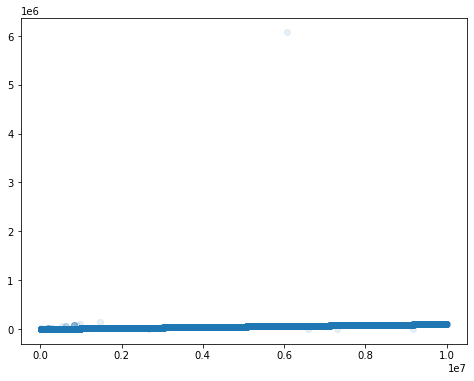

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(train['price'], train['squareMeters'], alpha = 0.1)

['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom']


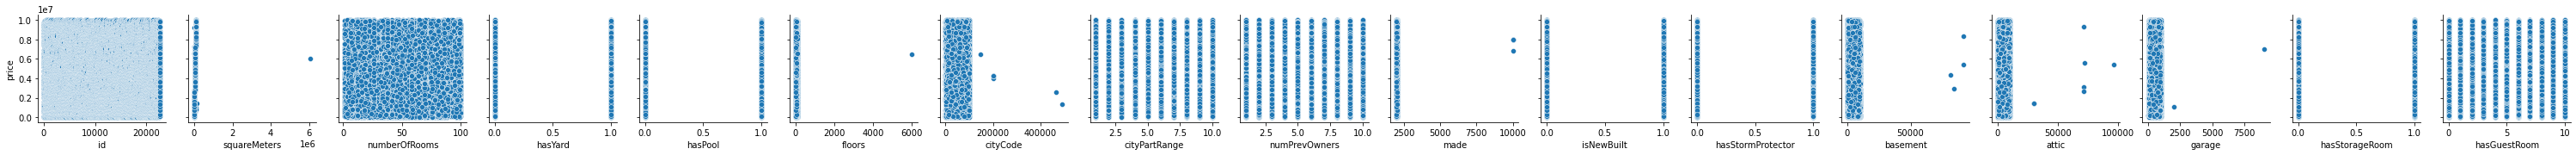

In [ ]:

attribute_cols = [col for col in train.columns if col != 'price']
print(attribute_cols)
# Create a scatter plot of each attribute column against the price
sns.pairplot(data=train, x_vars=attribute_cols, y_vars=['price'])

In [ ]:
len(train['cityCode'].unique())

7810

In [ ]:
corr=train.corr()
corr

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
id,1.000000,-0.001377,0.003697,-0.013849,-0.011452,-0.011556,0.007562,0.012823,-0.000870,0.004804,0.004701,0.000605,0.001734,0.001661,0.010885,0.011835,0.001892,-0.008060
squareMeters,-0.001377,1.000000,0.056755,-0.006512,-0.001615,0.017832,0.019843,0.002738,-0.000150,0.014827,0.010350,0.017886,-0.018948,-0.008333,-0.063946,0.006013,-0.005814,0.591749
numberOfRooms,0.003697,0.056755,1.000000,-0.000989,0.000197,0.044159,-0.008527,0.012343,0.021984,0.004819,-0.008951,0.011712,0.023536,0.027370,0.066873,-0.007623,-0.015969,0.091681
hasYard,-0.013849,-0.006512,-0.000989,1.000000,-0.068559,-0.010663,0.002786,-0.002071,-0.002494,-0.008165,0.001580,0.005141,-0.011966,-0.003421,-0.001047,0.006715,-0.007774,-0.002545
hasPool,-0.011452,-0.001615,0.000197,-0.068559,1.000000,-0.000490,0.008218,-0.002603,0.000512,-0.007610,0.032965,0.014905,0.003251,-0.001070,0.007199,0.016283,-0.006831,0.006023
floors,-0.011556,0.017832,0.044159,-0.010663,-0.000490,1.000000,0.005899,0.000913,0.009200,0.004584,-0.005746,-0.002473,0.007887,-0.006231,0.023794,-0.007920,-0.020811,0.038374
cityCode,0.007562,0.019843,-0.008527,0.002786,0.008218,0.005899,1.000000,0.009425,-0.003807,0.008044,-0.000551,-0.003309,0.000686,0.017507,0.007452,0.006606,0.002911,0.021986
cityPartRange,0.012823,0.002738,0.012343,-0.002071,-0.002603,0.000913,0.009425,1.000000,0.021518,0.005075,0.002154,-0.000393,0.000288,0.010329,-0.001874,0.003465,0.018328,-0.009366
numPrevOwners,-0.000870,-0.000150,0.021984,-0.002494,0.000512,0.009200,-0.003807,0.021518,1.000000,0.002074,-0.001010,-0.013071,-0.005544,0.001098,-0.004935,0.001031,0.013139,-0.008546
made,0.004804,0.014827,0.004819,-0.008165,-0.007610,0.004584,0.008044,0.005075,0.002074,1.000000,-0.002023,-0.001982,0.004274,0.010601,-0.006403,-0.008561,-0.009767,0.024270


In [ ]:
cat_cols = []
numeric_cols =[]
for col in train.columns:
    if(len(train[col].unique())<=2):
        cat_cols.append(col)
    else:
        numeric_cols.append(col)
print("Categorical :",cat_cols)
print("numerical :",numeric_cols)

Categorical : ['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom']
numerical : ['id', 'squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'basement', 'attic', 'garage', 'hasGuestRoom', 'price']


# data cleaning

In [ ]:
x=train.drop(["price","id"],axis=1)
y=train["price"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)


In [ ]:
x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [ ]:
x_train.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,1.818400e+04,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000
mean,4.666084e+04,48.206060,0.472558,0.452596,47.281456,50103.648482,5.574626,5.608392,2008.458095,0.471183,0.461010,5292.274747,5062.619721,529.884239,0.460900,5.142928
std,5.337971e+04,28.293269,0.499260,0.497761,51.746394,29972.270657,2.734596,2.714386,132.786282,0.499183,0.498491,3099.249263,3067.273556,276.646561,0.498483,3.068195
min,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000
25%,2.056325e+04,25.000000,0.000000,0.000000,25.000000,22931.500000,3.000000,3.000000,2000.000000,0.000000,0.000000,2997.000000,2581.750000,295.000000,0.000000,3.000000
50%,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50579.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5367.000000,4975.000000,514.000000,0.000000,5.000000
75%,7.152700e+04,75.000000,1.000000,1.000000,69.000000,76548.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7748.000000,7675.500000,765.000000,1.000000,8.000000
max,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000


<AxesSubplot:>

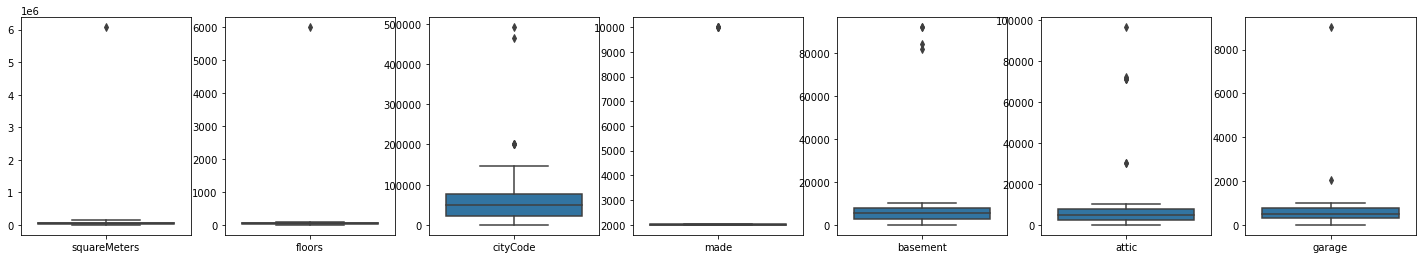

In [ ]:
figbox, axbox = plt.subplots(1, 7, figsize=(25, 4))
sns.boxplot(data=train[["squareMeters"]], ax=axbox[0])
sns.boxplot(data=train[["floors"]], ax=axbox[1])
sns.boxplot(data=train[["cityCode"]], ax=axbox[2])
sns.boxplot(data=train[["made"]], ax=axbox[3])
sns.boxplot(data=train[["basement"]], ax=axbox[4])
sns.boxplot(data=train[["attic"]], ax=axbox[5])
sns.boxplot(data=train[["garage"]], ax=axbox[6])

In [ ]:
def outliers(col):
    z_scores = np.abs((col - col.mean()) / col.std())
    outlier_indices = np.where(z_scores > 3)[0]
    return outlier_indices

In [ ]:
outlier_squareMeters = outliers(x_train["squareMeters"])
print(outlier_squareMeters)
ot_basement = outliers(x_train["basement"])
print(ot_basement)

[823]
[  430  3096  9286 12305]


In [ ]:
# x_train.loc[(x_train['squareMeters'] > 1.25e5),'squareMeters'] = x_train.loc[(train['squareMeters'] > 1.25e5),'squareMeters']/100
# x_train.drop(x_train[(x_train['squareMeters'] > 2e6)].index, inplace=True)

In [ ]:
outlier_made = outliers(x_train["made"])
outlier_made

array([ 1679,  1915,  8694, 16298, 16355], dtype=int64)

In [ ]:
outlier_floors = outliers(x_train["floors"])
outlier_floors

array([4851], dtype=int64)

In [ ]:
remove =np.concatenate((outlier_made , outlier_floors,outlier_squareMeters))
x_train_f = x_train.drop(index=remove).reset_index(drop=True)
y_train_f=y_train.drop(index=remove).reset_index(drop=True)

In [ ]:
x_train_f=x_train_f.drop(["cityCode"],axis=1)
x_test = x_test.drop(["cityCode"],axis=1)
test=test.drop(["cityCode"],axis=1)

In [ ]:
x_train_f["made"]=2022-x_train_f["made"]
x_test["made"]=2022-x_test["made"]
test["made"]=2022-test["made"]

In [ ]:
x_train_f.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000,18177.000000
mean,46319.861033,48.201298,0.472685,0.452660,46.950432,5.574242,5.608241,15.740936,0.471200,0.460967,5292.119327,5062.519943,529.901304,0.460967,5.143643
std,29208.409483,28.296405,0.499267,0.497768,26.994997,2.734552,2.714715,8.106693,0.499184,0.498488,3099.548590,3067.337674,276.652601,0.498488,3.068413
min,89.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000
25%,20537.000000,25.000000,0.000000,0.000000,25.000000,3.000000,3.000000,8.000000,0.000000,0.000000,2997.000000,2582.000000,295.000000,0.000000,3.000000
50%,44476.000000,47.000000,0.000000,0.000000,45.000000,6.000000,6.000000,16.000000,0.000000,0.000000,5367.000000,4975.000000,514.000000,0.000000,5.000000
75%,71527.000000,75.000000,1.000000,1.000000,69.000000,8.000000,8.000000,22.000000,1.000000,1.000000,7748.000000,7677.000000,765.000000,1.000000,8.000000
max,146181.000000,100.000000,1.000000,1.000000,100.000000,10.000000,10.000000,32.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000


x_train_f
y_train_f
x_test
y_test

In [ ]:
print(x_train_f.shape)
print(y_train_f.shape)
print(x_test.shape)
print(y_test.shape)

(18177, 15)
(18177,)
(4546, 15)
(4546,)


In [ ]:
lr =LinearRegression()
lr = lr.fit(x_train_f, y_train_f)
y_train_preds = lr.predict(x_test)
mae = mean_absolute_error(y_test, y_train_preds)
mse = mean_squared_error(y_test, y_train_preds)
rmse = mean_squared_error(y_test, y_train_preds, squared=False)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
lr_lst=[mae,mse,rmse]
for i in range(3):
    lr_lst[i]=round(lr_lst[i])

Mean Absolute Error: 14296.644
Mean Squared Error: 26551857393.824
Root Mean Squared Error: 162947.407


In [ ]:
rfr = RandomForestRegressor()
rfr = rfr.fit(x_train_f, y_train_f)
y_train_preds = rfr.predict(x_test)
mae = mean_absolute_error(y_test, y_train_preds)
mse = mean_squared_error(y_test, y_train_preds)
rmse = mean_squared_error(y_test, y_train_preds, squared=False)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
rfr_lst=[mae,mse,rmse]
for i in range(3):
    rfr_lst[i]=round(rfr_lst[i])


Mean Absolute Error: 13963.232
Mean Squared Error: 50973482125.407
Root Mean Squared Error: 225773.077


In [ ]:
import math
x = xgboost.XGBRegressor()
x=x.fit(x_train_f, y_train_f)
y_train_preds = x.predict(x_test)

mae = mean_absolute_error(y_test, y_train_preds)
mse = mean_squared_error(y_test, y_train_preds)
rmse = mean_squared_error(y_test, y_train_preds, squared=False)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

xgb=[mae,mse,rmse]
for i in range(3):
    xgb[i]=round(xgb[i])
print(xgb)

Mean Absolute Error: 20837.945
Mean Squared Error: 35710167818.772
Root Mean Squared Error: 188971.341
[20838, 35710167819, 188971]


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge=ridge.fit(x_train_f, y_train_f)
y_train_preds = x.predict(x_test)

mae = mean_absolute_error(y_test, y_train_preds)
mse = mean_squared_error(y_test, y_train_preds)
rmse = mean_squared_error(y_test, y_train_preds, squared=False)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
rid=[mae,mse,rmse]
for i in range(3):
    rid[i]=round(rid[i])

Mean Absolute Error: 20837.945
Mean Squared Error: 35710167818.772
Root Mean Squared Error: 188971.341


In [ ]:
t = pd.DataFrame({"metric":["mae","mse","rmse"],"LinearRegression":lr_lst,"RandomForest":rfr_lst,"XGBoost":xgb,"Ridge":rid})
t

,metric,LinearRegression,RandomForest,XGBoost,Ridge
0,mae,14297,13963,20838,20838
1,mse,26551857394,50973482125,35710167819,35710167819
2,rmse,162947,225773,188971,188971


In [ ]:
y_p = rfr.predict([[19341,95,1,0,37,9,6,4,0,0,7173,9233,101,0,3]])
print(y_p)

[1943258.355]


In [ ]:
test.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
id,,,,,,,,,,,,,,,
22730,47580,89,0,1,8,5,3,27,0,0,6885,8181,241,0,8
22731,62083,38,0,0,87,10,3,28,1,1,4601,9237,393,1,4
22732,90499,75,1,1,37,9,6,25,0,1,7454,2680,305,0,2
22733,16354,47,1,1,9,6,5,3,1,1,705,5097,122,1,5
22734,67510,8,0,0,55,3,7,8,1,1,3715,7979,401,1,9


 180315.255

In [ ]:
submission_rf = pd.DataFrame(lr.predict(test))
ID = test.index.to_frame().reset_index(drop = True)
df_submission_rf = pd.concat([ID,submission_rf], axis = 1).rename({0:"price"}, axis = 1)
df_submission_rf

,id,price
0,22730,4.759164e+06
1,22731,6.206570e+06
2,22732,9.044979e+06
3,22733,1.658541e+06
4,22734,6.740734e+06
...,...,...
15149,37879,8.613115e+06
15150,37880,4.580567e+06
15151,37881,7.342627e+06
15152,37882,7.755130e+06
